### Tienda en línea

Se desea desarrollar un estudio en conjunto con el departamento de marketing de una tienda en línea con el fin de aumentar los ingresos de la misma, para lo cual se ha tiene una lista de hipótesis.

Este proyecto se enfoca en realizar un análisis preliminar con los datos que se tienen que corresponden al período del mes de agosto del 2019. Los datos, se encuentran distribuidos en 3 datasets que contienen información sobre los hipótesis, transacciones y visitas de clientes a la tienda online.  

La información proporcionada está plasmada en datasets de 9, 1197 y 62 registros respectivamente.

El objetivo principal es probar una lista de hipótesis en conjunto con el equipo de marketing con el fin de incrementar los ingresos de la tienda.

## Inicialización

In [2]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as st

from importlib import reload
plt=reload(plt)

In [3]:
# Carga el archivo de datos

df_marketing_hypotheses = pd.read_csv('hypotheses_us.csv',  sep=';')

# Para el momento de enviar el proyecto es de esta forma
#df_trips1 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/project_sql_result_01.csv')  

In [4]:
# Carga el archivo de datos

df_marketing_orders = pd.read_csv('orders_us.csv')

In [5]:
# Carga el archivo de datos

df_marketing_visits = pd.read_csv('visits_us.csv')

## Exploración_inicial

## Dataset 1

In [6]:
df_marketing_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
df_marketing_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [8]:
df_marketing_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
df_marketing_hypotheses.columns

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort'], dtype='object')

In [10]:
df_marketing_orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [11]:
df_marketing_visits.columns

Index(['date', 'group', 'visits'], dtype='object')

In [12]:
df_marketing_hypotheses.shape

(9, 5)

In [13]:
df_marketing_orders.shape

(1197, 5)

In [14]:
df_marketing_visits.shape

(62, 3)

In [15]:
df_marketing_hypotheses.head(5)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [16]:
df_marketing_orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [17]:
df_marketing_visits.head(5)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [18]:
df_marketing_hypotheses.describe()

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [19]:
df_marketing_orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [20]:
df_marketing_visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


## Limpieza_y_Preparación_de_los_datos

### Verificación_y_corrección_de_los_tipos_de_datos

In [21]:
# Convirtiendo la feature date al tipo de dato más adecuado en df_marketing_orders

df_marketing_orders['date'] = pd.to_datetime(df_marketing_orders['date'])

In [22]:
# Convirtiendo la feature date al tipo de dato más adecuado en df_marketing_visits

df_marketing_visits['date'] = pd.to_datetime(df_marketing_visits['date'])

In [23]:
# Convirtiendo la feature group al tipo de dato category más adecuado en df_marketing_orders

#df_marketing_orders['group'] = df_marketing_orders['group'].astype('category') 

In [24]:
# Convirtiendo la feature group al tipo de dato category más adecuado en df_marketing_visits

#df_marketing_visits['group'] = df_marketing_visits['group'].astype('category') 

In [25]:
df_marketing_hypotheses.columns = map(str.lower, df_marketing_hypotheses.columns)
df_marketing_hypotheses.head(5)

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [26]:
df_marketing_hypotheses['reach'] =df_marketing_hypotheses['reach'].astype('int64') 

In [27]:
df_marketing_hypotheses['impact'] =df_marketing_hypotheses['impact'].astype('int64')  

In [28]:
df_marketing_hypotheses['confidence'] =df_marketing_hypotheses['confidence'].astype('int64') 

In [29]:
df_marketing_hypotheses['effort'] =df_marketing_hypotheses['effort'].astype('int64') 

In [30]:
df_marketing_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### Revisión de la existencia de valores duplicados 

In [31]:
df_marketing_hypotheses.duplicated().sum()

0

In [32]:
df_marketing_orders.duplicated().sum()

0

In [33]:
df_marketing_visits.duplicated().sum()

0

### Revisión de la existencia de valores faltantes 

In [34]:
df_marketing_hypotheses.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

In [35]:
df_marketing_orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [36]:
df_marketing_visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [37]:
df_marketing_hypotheses.head(10)

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


## Conclusión de la parte de limpieza y preparación de los datos

1- Se revisaron los 3 datasets encontrándose los siguientes problemas:

-existen 2 features de tipo fecha designadas como Object

-existen 4 features como Object en dataset df_marketing_hypotheses que se convirtieron al tipo entero

-existe 1 feature de tipo categoría designada como Object en dataset df_marketing_orders  NOOO, esto al finall lo djé como estaba.

-existe 1 feature de tipo categoría designada como Object en dataset df_marketing_visits NOOO, esto al finall lo djé como estaba.

-nombres de columnas que no están en minúsculas 

Acciones correspondientes realizadas:

1- Luego de la verificación del tipo de datos de las columnas, se convirtió la columna 'date' al tipo datetime en  df_marketing_orders y en df_marketing_visits.

2- Se convirtieron las columnas Reach, Impact, Confidence y Effort al tipo entero en dataset df_marketing_hypotheses que se ajusta mejor al tipo de dato que contiene.

3- Se convirtieron a minúsculas todas las features 

4- No se encontraron espacios intermedios en los nombres de los features, o sea, todos quedaron escritos de forma homogénea.

5- Se verificó que no existan filas con datos faltantes.

6- Se verificó la no existencia de valores duplicados en los datos.

### Priorizando las hipótesis 

In [38]:
# Aplicando framework ICE 
# ICE = (Impact * Confidence)/Effort

df_marketing_hypotheses['ice'] = df_marketing_hypotheses['impact'] *df_marketing_hypotheses['confidence'] 

In [39]:
df_marketing_hypotheses['ice'] = df_marketing_hypotheses['ice']/ df_marketing_hypotheses['effort']

In [40]:
df_marketing_hypotheses.sort_values(by='ice' ,ascending=False).head(10)

,hypothesis,reach,impact,confidence,effort,ice
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


In [41]:
# Aplicando framework RICE 
# RICE = (Reach * Impact * Confidence)/Effort

df_marketing_hypotheses['rice'] = df_marketing_hypotheses['reach']* df_marketing_hypotheses['impact'] * df_marketing_hypotheses['confidence'] 
df_marketing_hypotheses['rice'] = df_marketing_hypotheses['rice']/ df_marketing_hypotheses['effort']
df_marketing_hypotheses.sort_values(by='rice' ,ascending=False).head(10)

,hypothesis,reach,impact,confidence,effort,ice,rice
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


Conclusión: 

Tomando en cuenta que las posiciones relativas son más importantes, se observa que en la tabla el ICE presenta la 4, 3, 5, 1 como las hipótesis más prometedoras, por su parte la tabla el RICE presenta la 4, 5, 1, 3 como las hipótesis más prometedoras. Sin embargo, esta vez en RICE aparecen en orden diferente las hipótesis 5 y 3. Esto se debe a que el parámetro Effort es 8 en la hipótesis 3, mientras que las otras hipótesis tienen valores más bajos.

### Análisis de test A/B

<Axes: title={'center': 'Distribución del ingreso por grupos'}, xlabel='Grupos', ylabel='Ingresos'>

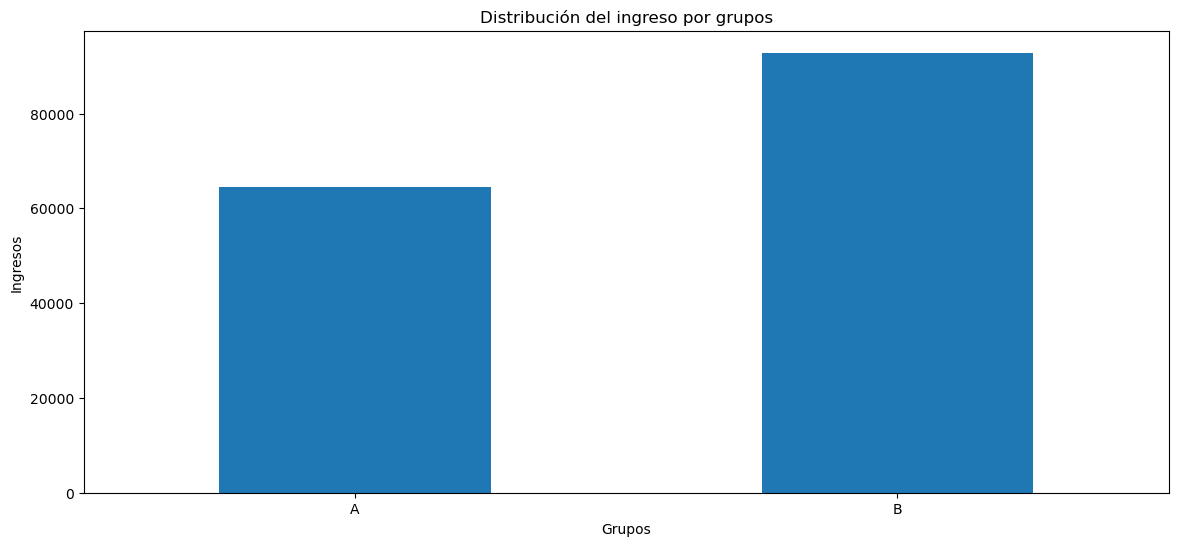

In [42]:
# 1- Representación gráficamente del ingreso acumulado por grupo. 

df_filtered = df_marketing_orders.groupby(['group'])['revenue'].sum()
df_filtered.plot(kind='bar', rot= 0, title='Distribución del ingreso por grupos', ylabel='Ingresos', xlabel='Grupos', figsize=(14, 6))

In [43]:
total = df_marketing_orders['revenue'].sum() 
total

157395.5

In [44]:
df_filtered = df_marketing_orders.groupby(['group'])['transactionId'].count()
df_filtered

group
A    557
B    640
Name: transactionId, dtype: int64

In [45]:
mis_booleans = df_marketing_orders['group']=='A' 
value = df_marketing_orders[mis_booleans].groupby(['group'])['revenue'].sum()
porcentaje = value / total
print(porcentaje*100)

group
A    41.014451
Name: revenue, dtype: float64


Conclusión:

Se observa que el grupo B presenta un ingreso superior en comparación al grupo A, concentrando el 58.98 % que representan 640 transacciones realizadas mientras que grupo A concentra 41 % que representan 557 transacciones. El grupo B supera en los ingresos al grupo A en un 17.1 %.

In [46]:
df_filtered2 = df_marketing_orders.groupby(['group'])['transactionId'].count()
df_filtered2.reset_index()

,group,transactionId
0,A,557
1,B,640


In [47]:
df_marketing_orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [48]:
difference =  df_filtered2['B'] - df_filtered2['A']
difference

83

<Axes: title={'center': 'Número de pedidos promedio por grupos'}, xlabel='Grupos', ylabel='Ingresos'>

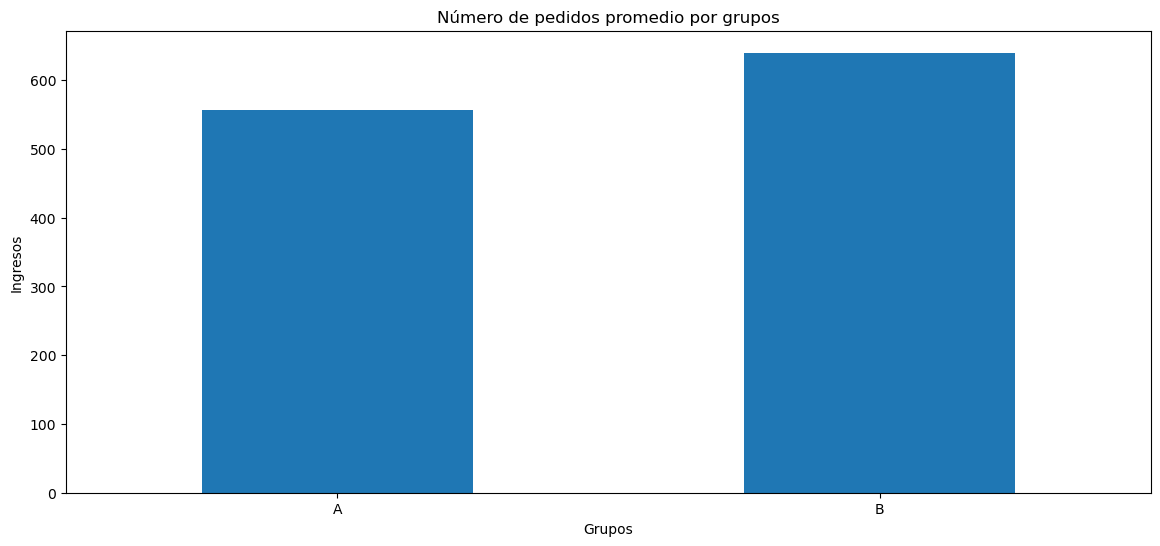

In [49]:
df_filtered2.plot(kind='bar', rot= 0, title='Número de pedidos promedio por grupos', ylabel='Ingresos', xlabel='Grupos', figsize=(14, 6))

Conclusión:

El grupo B presenta una cantidad de órdenes o transacciones superior al grupo A, con 640 transacciones en grupo B por 557 transacciones en el grupo A con una diferencia de 83 transacciones. 

In [50]:
# Se crea una matriz con valores únicos de parejas fecha-grupo
datesGroups = df_marketing_orders[['date','group']].drop_duplicates()

#  Se obtienen los datos diarios acumulados agregados sobre los pedidos 
ordersAggregated = datesGroups.apply(lambda x: df_marketing_orders[np.logical_and(df_marketing_orders['date'] <= x['date'], df_marketing_orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5
...,...,...,...,...,...
496,2019-08-29,B,596,544,87343.0
730,2019-08-30,A,545,493,63563.5
690,2019-08-30,B,620,567,90736.3
958,2019-08-31,A,557,503,64554.9


In [51]:
# Obtención de los datos diarios acumulados agregados sobre los visitantes
visitorsAggregated = datesGroups.apply(lambda x: df_marketing_visits[np.logical_and(df_marketing_visits['date'] <= x['date'], df_marketing_visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [52]:
# Se fusiona las dos tablas en una y da a sus columnas nombres descriptivos
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'transactionId', 'visitorId', 'revenue', 'visits']
cumulativeData

,date,group,transactionId,visitorId,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


In [53]:
# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactionId']]

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactionId']]
cumulativeRevenueA

,date,revenue,transactionId
0,2019-08-01,2356.8,24
2,2019-08-02,3860.3,44
4,2019-08-03,5675.5,68
6,2019-08-04,6822.1,84
8,2019-08-05,8810.2,109
10,2019-08-06,9600.0,127
12,2019-08-07,11842.9,145
14,2019-08-08,13373.3,161
16,2019-08-09,16320.4,177
18,2019-08-10,19608.6,193


In [54]:
cumulativeRevenueB

,date,revenue,transactionId
1,2019-08-01,1620.0,21
3,2019-08-02,4243.8,45
5,2019-08-03,6050.6,61
7,2019-08-04,7767.9,78
9,2019-08-05,9262.9,101
11,2019-08-06,13069.3,129
13,2019-08-07,16600.8,153
15,2019-08-08,20088.6,180
17,2019-08-09,22646.7,205
19,2019-08-10,24367.1,228


In [55]:
# Tabla para generar el Gráfico de diferencia relativa

# reunir los datos en un DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue

,date,revenueA,transactionIdA,revenueB,transactionIdB
0,2019-08-01,2356.8,24,1620.0,21
1,2019-08-02,3860.3,44,4243.8,45
2,2019-08-03,5675.5,68,6050.6,61
3,2019-08-04,6822.1,84,7767.9,78
4,2019-08-05,8810.2,109,9262.9,101
5,2019-08-06,9600.0,127,13069.3,129
6,2019-08-07,11842.9,145,16600.8,153
7,2019-08-08,13373.3,161,20088.6,180
8,2019-08-09,16320.4,177,22646.7,205
9,2019-08-10,19608.6,193,24367.1,228


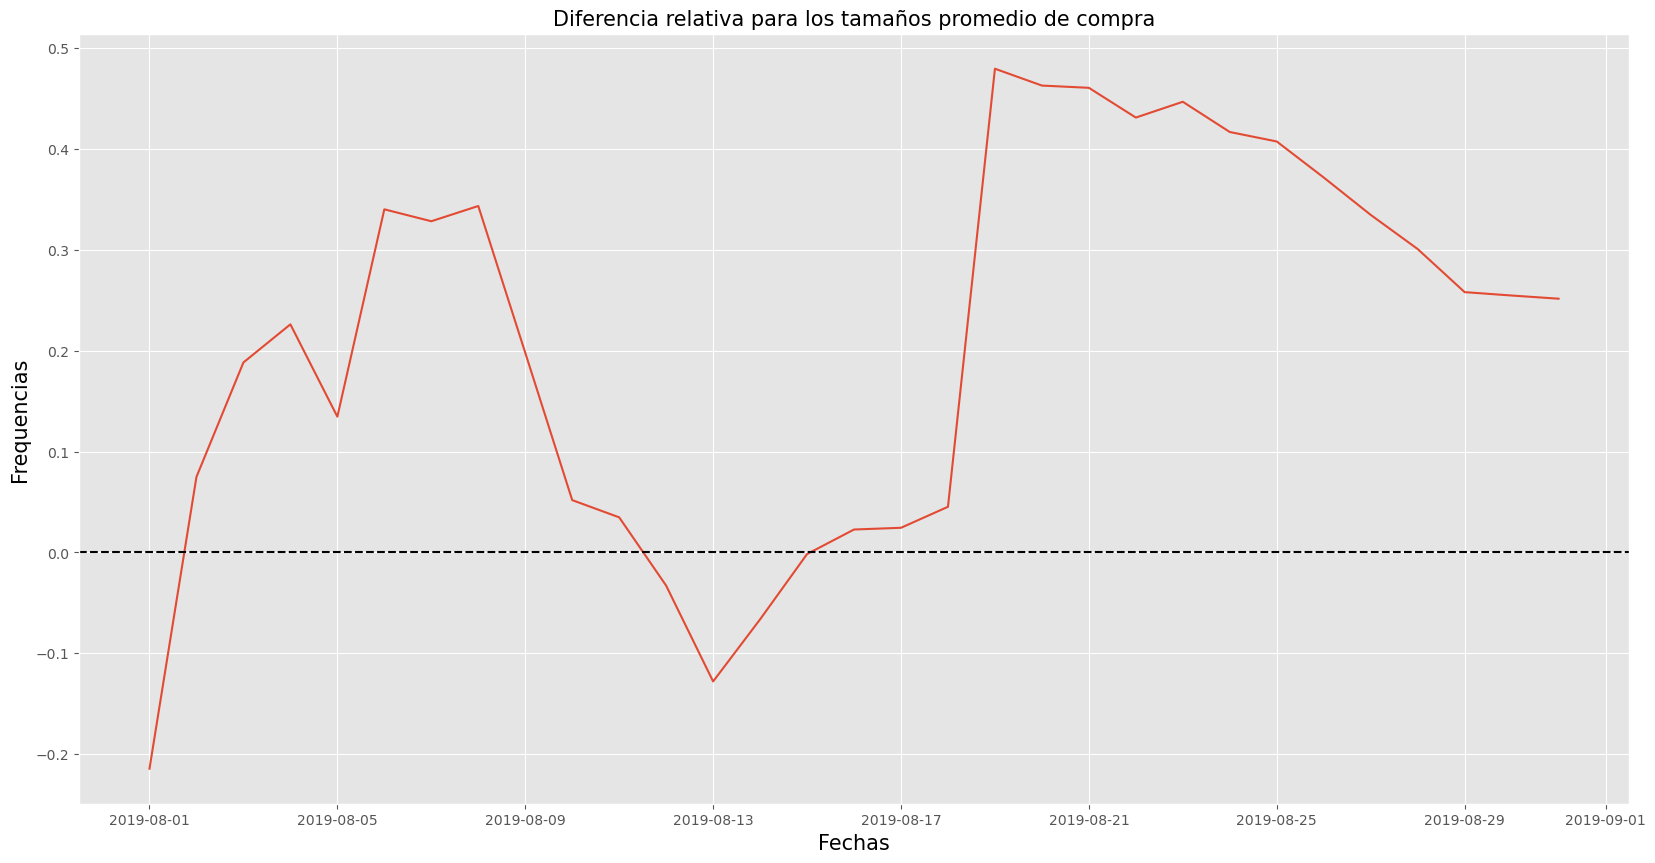

In [56]:
# 3- Trazar un gráfico de diferencia relativa para los tamaños de compra promedio

plt.style.use('ggplot')
plt.figure(figsize=(20,10)) 
plt.title('Diferencia relativa para los tamaños promedio de compra',fontsize=15)
plt.xlabel('Fechas',fontsize=15)
plt.ylabel('Frequencias',fontsize=15)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionIdB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionIdA'])-1)

# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

Conclusión:

Del gráfico anterior se observa que en varios puntos la diferencia entre los grupos se incrementa, lo cual podría deberse a valores atípicos en los datos.

In [57]:
# 4- Cálculo la tasa de conversión de cada grupo 
# ['date', 'group', 'transactionId', 'visitorId', 'revenue', 'visits']
# Se calcula la conversión acumulada
cumulativeData['conversion'] = cumulativeData['transactionId']/cumulativeData['visits']

# seleccionar datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# seleccionar datos en el grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
cumulativeDataB

,date,group,transactionId,visitorId,revenue,visits,conversion
1,2019-08-01,B,21,20,1620.0,713,0.029453
3,2019-08-02,B,45,43,4243.8,1294,0.034776
5,2019-08-03,B,61,59,6050.6,1803,0.033833
7,2019-08-04,B,78,75,7767.9,2573,0.030315
9,2019-08-05,B,101,98,9262.9,3280,0.030793
11,2019-08-06,B,129,123,13069.3,3935,0.032783
13,2019-08-07,B,153,146,16600.8,4644,0.032946
15,2019-08-08,B,180,171,20088.6,5298,0.033975
17,2019-08-09,B,205,193,22646.7,5908,0.034699
19,2019-08-10,B,228,215,24367.1,6277,0.036323


In [58]:
cumulativeDataA

,date,group,transactionId,visitorId,revenue,visits,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
2,2019-08-02,A,44,38,3860.3,1338,0.032885
4,2019-08-03,A,68,62,5675.5,1845,0.036856
6,2019-08-04,A,84,77,6822.1,2562,0.032787
8,2019-08-05,A,109,100,8810.2,3318,0.032851
10,2019-08-06,A,127,114,9600.0,3985,0.031870
12,2019-08-07,A,145,131,11842.9,4629,0.031324
14,2019-08-08,A,161,146,13373.3,5239,0.030731
16,2019-08-09,A,177,159,16320.4,5856,0.030225
18,2019-08-10,A,193,175,19608.6,6262,0.030821


In [59]:
cumulativeDataA['day'] = cumulativeDataA['date'].dt.day

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12484\1107940817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulativeDataA['day'] = cumulativeDataA['date'].dt.day


In [60]:
cumulativeDataA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 60
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           31 non-null     datetime64[ns]
 1   group          31 non-null     object        
 2   transactionId  31 non-null     int64         
 3   visitorId      31 non-null     int64         
 4   revenue        31 non-null     float64       
 5   visits         31 non-null     int64         
 6   conversion     31 non-null     float64       
 7   day            31 non-null     int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(1)
memory usage: 2.1+ KB


In [61]:
cumulativeDataB['day'] = cumulativeDataB['date'].dt.day

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12484\3498561394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulativeDataB['day'] = cumulativeDataB['date'].dt.day


In [62]:
# trazar los gráficos

cumulativeDataB

,date,group,transactionId,visitorId,revenue,visits,conversion,day
1,2019-08-01,B,21,20,1620.0,713,0.029453,1
3,2019-08-02,B,45,43,4243.8,1294,0.034776,2
5,2019-08-03,B,61,59,6050.6,1803,0.033833,3
7,2019-08-04,B,78,75,7767.9,2573,0.030315,4
9,2019-08-05,B,101,98,9262.9,3280,0.030793,5
11,2019-08-06,B,129,123,13069.3,3935,0.032783,6
13,2019-08-07,B,153,146,16600.8,4644,0.032946,7
15,2019-08-08,B,180,171,20088.6,5298,0.033975,8
17,2019-08-09,B,205,193,22646.7,5908,0.034699,9
19,2019-08-10,B,228,215,24367.1,6277,0.036323,10


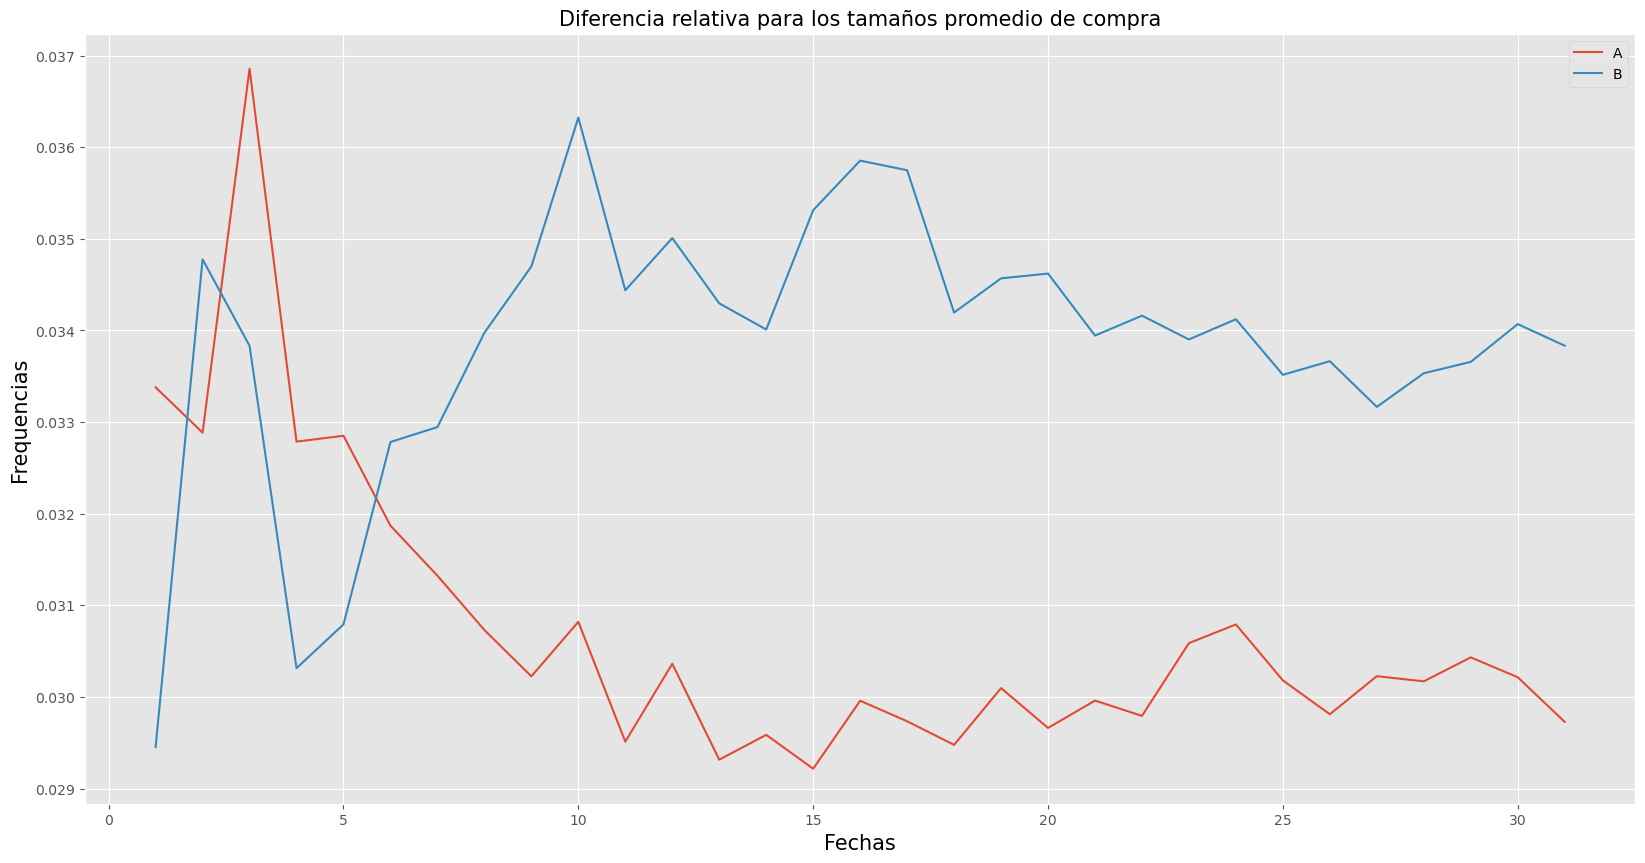

In [63]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10)) 
plt.title('Diferencia relativa para los tamaños promedio de compra',fontsize=15)
plt.xlabel('Fechas',fontsize=15)
plt.ylabel('Frequencias',fontsize=15)

plt.plot(cumulativeDataA['day'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['day'], cumulativeDataB['conversion'], label='B')

# Se establece la escala de los ejes
#plt.axis(['2019-08-01', '2019-08-31', 0, 0.015]) 
plt.legend()
plt.show()

Conclusión:

Luego de observar el gráfico anterior que corresponde al período desde el 2019-08-01 hasta el 2019-08-30, se puede observar que los grupos fluctúan, pero luego la tasa de conversión del grupo B aumenta para luego estabilizarse mientras que la tasa del grupo A disminuye, aunque también se estabiliza.  

In [75]:
cumulativeData

,date,group,transactionId,visitorId,revenue,visits,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
1,2019-08-01,B,21,20,1620.0,713,0.029453
2,2019-08-02,A,44,38,3860.3,1338,0.032885
3,2019-08-02,B,45,43,4243.8,1294,0.034776
4,2019-08-03,A,68,62,5675.5,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708,0.033657
58,2019-08-30,A,545,493,63563.5,18037,0.030216
59,2019-08-30,B,620,567,90736.3,18198,0.034070
60,2019-08-31,A,557,503,64554.9,18736,0.029729


In [134]:
# 5- Gráfico de dispersión del número de pedidos por usuario

df_filtered3 = pd.DataFrame()
df_filtered3['orders_per_user'] = df_marketing_orders.groupby(['visitorId'])['transactionId'].count()
df_filtered3 = df_filtered3.reset_index()
df_filtered3.sort_values(by='orders_per_user', ascending=False).head(20)

,visitorId,orders_per_user
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


In [119]:
df_filtered3['orders_per_user'].sum()

1197

In [130]:
#mis_booleans = (df_filtered3['orders_per_user']==2 or df_filtered3['orders_per_user']==3  or df_filtered3['orders_per_user']==4  )
mis_booleans = (df_filtered3['orders_per_user']==2)
df_new = df_filtered3[mis_booleans].sum()
df_new

visitorId          152537438251
orders_per_user             128
dtype: int64

In [131]:
mis_booleanss = (df_filtered3['orders_per_user']==3)
df_new += df_filtered3[mis_booleanss].sum()
df_new

visitorId          192501517485
orders_per_user             179
dtype: int64

In [133]:
mis_booleansss = (df_filtered3['orders_per_user']==4)
df_neww = df_filtered3[mis_booleansss].sum()
df_neww
#df_filtered3['orders_per_user'].sum()

visitorId          4658805978
orders_per_user            12
dtype: int64

In [129]:
mis_booleanss = (df_filtered3['orders_per_user']==3)
df_new = df_filtered3[mis_booleanss].sum()
df_new

visitorId          39964079234
orders_per_user             51
dtype: int64

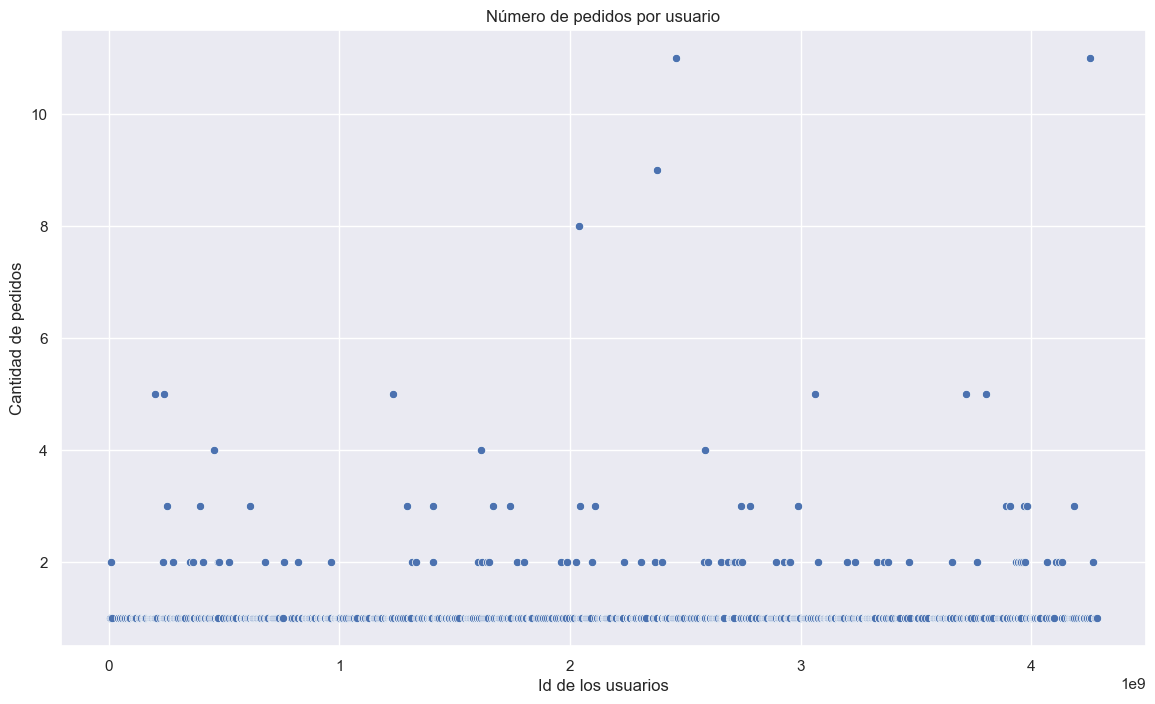

In [114]:
#fig = sns.scatterplot(data=df_filtered, x="visitorId", y="transactionId")
#plt.xlabel("Id de los usuarios")
#plt.ylabel("Cantidad de pedidos")
#plt.title("Número de pedidos por usuario") 
#sns.set(rc={'figure.figsize':(14,8)})
#plt.show(fig)
plt.style.use('ggplot')
fig = sns.scatterplot(data=df_filtered3, x="visitorId", y="orders_per_user")
plt.xlabel("Id de los usuarios")
plt.ylabel("Cantidad de pedidos")
plt.title("Número de pedidos por usuario") 
sns.set(rc={'figure.figsize':(14,8)})
plt.show(fig)

Conclusión:

Existen 10 usuarios con 5, 8, 9 y 11 pedidos, respectivamente, las cuales son cantidades muy por encima de lo que un usuario habitual haría, y que representan el 0.009% del total de clientes, y que sus pedidos representan el 2%, sin embargo, una parte significativa de los clientes realizó entre 2 y 4 pedidos cada uno, sienso 191 clientes, con pedidos que engloban el 15% del total.

In [93]:
df_filtered2 = pd.DataFrame()
df_filtered2['orders_per_user'] = cumulativeData.groupby(['visitorId'])['transactionId'].count()
df_filtered2 = df_filtered2.reset_index()
#df_filtered2

In [135]:
# 6- Cálculo de percentiles 95 y 99 para el número de pedidos por usuario
#cumulativeData.columns = ['date', 'group', 'transactionId', 'visitorId', 'revenue', 'visits']
np.percentile(df_filtered3['orders_per_user'], [95, 99])

array([2., 4.])

Conclusión:

Del dato anterior se concluye que el 95 % de los clientes tienen una cantidad de pedidos menores o iguales a 4 pedidos, o dicho de otra forma, que el 5 % de los clientes tienen una cantidad de pedidos superior a 4. 

In [101]:
df_filtered3['orders_per_user'].unique()

array([ 1,  2,  5,  3,  4,  8,  9, 11], dtype=int64)

In [140]:
#7-Gráfico de dispersión de los precios de los pedidos.

#NOTA: Dado que no se brinda la información explícita del precio de los pedidos, o el costo, se asume que todos los pedidos 
#tienen el mismo precio. 

# Hallando el precio # Precio = Revenue ÷ cantidad de pedidos 
price = df_marketing_orders['revenue'].sum()/df_marketing_orders['transactionId'].count()
price

131.49164578111947

In [148]:
df_marketing_orders['visitorId'].count()

1197

In [149]:
df_marketing_orders['revenue'].sum()

157395.5

Cada transación u orden tuvo un costo de $131.5 

In [141]:
df_filtered4 = pd.DataFrame()
df_filtered4['fullpay_per_user'] = df_marketing_orders.groupby(['visitorId'])['revenue'].sum()
df_filtered4 = df_filtered4.reset_index()
df_filtered4.sort_values(by='fullpay_per_user', ascending=False).head(20)

,visitorId,fullpay_per_user
463,1920142716,19920.4
503,2108080724,3120.1
1023,4256040402,2751.2
1026,4266935830,2440.4
569,2378935119,2230.1
316,1316129916,1466.0
314,1307669133,1425.8
213,888512513,1335.6
744,3062433592,1182.9
186,759473111,1115.7


In [143]:
df_filtered4['fullpay_per_user'].mean()

152.66294859359846

In [150]:
mis_booleans = (df_filtered4['fullpay_per_user']>=152)
df_new = df_filtered4[mis_booleans].groupby(['visitorId']).count()
df_new

,fullpay_per_user
visitorId,
8300375,1
71018815,1
102981183,1
113298937,1
148427295,1
...,...
4227830084,1
4231233292,1
4256040402,1


In [156]:
df_filtered5 = pd.DataFrame()
mis_booleans = (df_marketing_orders['revenue']>152)
#mis_booleans = (df_marketing_orders['revenue']<=152)
df_filtered5['clients_above_average'] = df_marketing_orders[mis_booleans].groupby(['visitorId'])['transactionId'].count()
df_filtered5 = df_filtered5.reset_index()
df_filtered5

,visitorId,clients_above_average
0,8300375,1
1,71018815,1
2,102981183,1
3,113298937,1
4,148427295,1
...,...,...
227,4227830084,1
228,4231233292,1
229,4256040402,5
230,4266935830,2


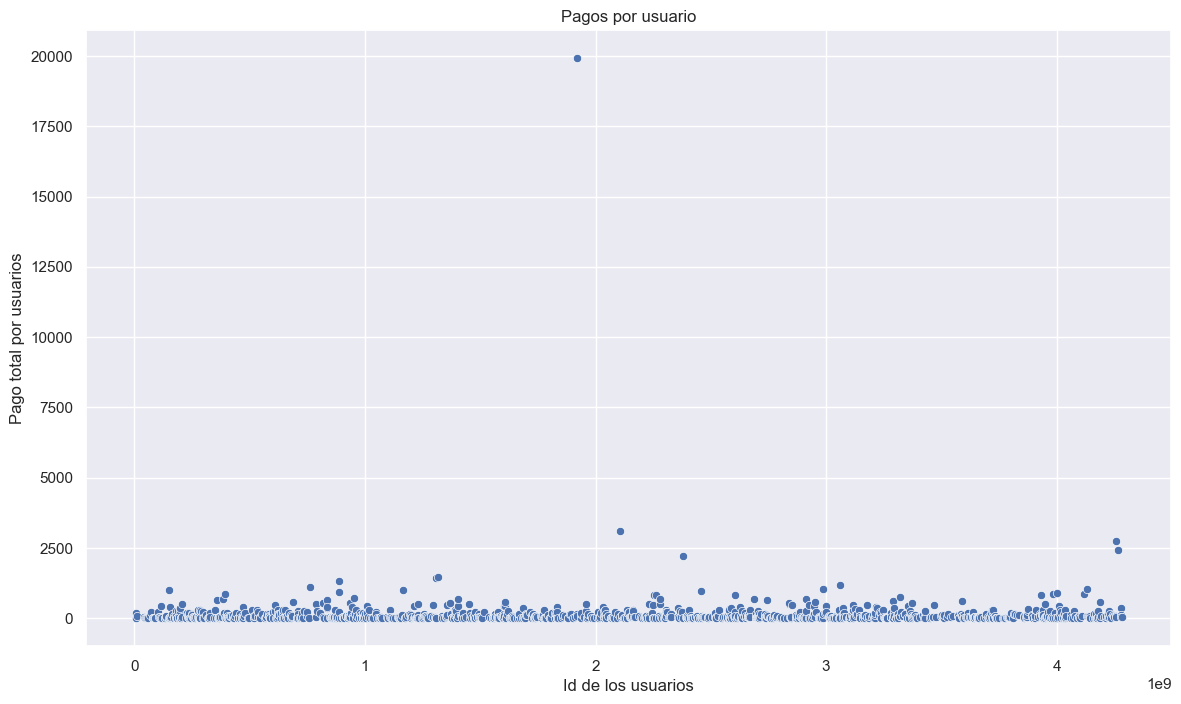

In [142]:
fig = sns.scatterplot(data=df_filtered4, x="visitorId", y="fullpay_per_user")
plt.xlabel("Id de los usuarios")
plt.ylabel("Pago total por usuarios")
plt.title("Pagos por usuario") 
sns.set(rc={'figure.figsize':(14,8)})
plt.show(fig)

Concusión:

Del gráfico anterior, se observa que la gran mayoría de los usuarios tienen un monto total de pago por sus pedidos igual o inferiores a la media de 152 pesos, es decir, 1044 clientes realizaron pedidos por un monto igual o inferior a la media, no obstante, existir un cliente con un monto total por valor de 20000 pesos lo cual constituye un valor atípico, y a su vez 252 clientes realizaron pedidos por valor total por encima de la media, entonces:

si se toma en cuenta el precio obtenido que se asumió de 152 que e igual par todos los pedidos, se obtiene que:

- existen 232 clientes que engloban compras por encima de la media y en conjunto pagaron $ {\$35264} \ $ para un 7 %

- existen 965 clientes que engloban compras igual o inferior de la media y en conjunto pagaron $ {\$146680} \ $ para un 93 %

In [ ]:
# 8- Cálculo de percentiles 95 y 99 de los precios de los pedidos



In [160]:
# Significancia estadística de la diferencia en la conversión entre los grupos 

#df_marketing_orders['date'] = df_marketing_orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
df_marketing_orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [158]:
#df_marketing_visits['date'] = df_marketing_visits['date'].map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))
df_marketing_visits.head(5)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [168]:
# Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')
ordersByUsersA = df_marketing_orders[df_marketing_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

In [165]:
ordersByUsersB = df_marketing_orders[df_marketing_orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders'] 

In [169]:
#  CHECARRRRR!!!!!
# pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

In [172]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(df_marketing_visits[df_marketing_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')] 


[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 498    1
 499    7
 500    1
 501    1
 502    1
 Name: orders, Length: 503, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18228    0
 18229    0
 18230    0
 18231    0
 18232    0
 Name: orders, Length: 18233, dtype: int64]

In [174]:
# df_marketing_visits, # df_marketing_orders, visitors is visits

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(df_marketing_visits[df_marketing_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(df_marketing_visits[df_marketing_visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [180]:
ordersByUsersA = df_marketing_orders[df_marketing_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = df_marketing_orders[df_marketing_orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(df_marketing_visits[df_marketing_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(df_marketing_visits[df_marketing_visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.017
0.138


Conclusión:

Según los datos en bruto si hay diferencias entre los grupos A y B.

El primer valor obtenido de la salida es el valor p — 0,017, que es menor que 0,05. Entonces, se rechaza la hipótesis nula. 

El segundo valor obtenido de la salida arrojó 13,8% que es la pérdida relativa del grupo B.

(ya que no hay una diferencia estadísticamente significativa en la conversión entre los grupos. )

In [186]:
#ordersByUsersA

In [181]:
# Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto

# df_marketing_visits, # df_marketing_orders, visitors is visits

print('{0:.3f}'.format(st.mannwhitneyu(df_marketing_orders[df_marketing_orders['group']=='A']['revenue'], df_marketing_orders[df_marketing_orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(df_marketing_orders[df_marketing_orders['group']=='B']['revenue'].mean()/df_marketing_orders[df_marketing_orders['group']=='A']['revenue'].mean()-1)) 

0.692
0.252


Conclusión:

El valor p obtenido (0.692) es notablemente superior a 0,05 por lo que no hay motivo para rechazar la hipótesis nula y concluir que el tamaño medio de los pedidos difiere entre los grupos. Por otro lado, el segundo valor obtenido de 0.252, indica que el tamaño de pedido promedio para el grupo B no es más pequeño que para el grupo A.

In [190]:
# Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados
# userId es visitorId

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)
usersWithExpensiveOrders = df_marketing_orders[df_marketing_orders['revenue'] > 20000]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

227    2038680547
326    2378935119
278    2458001652
499    4256040402
dtype: int64
(4,)


In [189]:
# df_marketing_visits, # df_marketing_orders, visitors is visits

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(df_marketing_visits[df_marketing_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(df_marketing_visits[df_marketing_visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

#Apliquemos el criterio estadístico de Mann-Whitney a las muestras resultantes:
print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.016
0.149


Conclusión:

Se observa que el valor de p disminuyó, y sigue siendo menor que 0,05, entonces, se rechaza la hipótesis nula, y ahora la diferencia entre los segmentos es del 14.9 %

In [192]:
# Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados
# Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

print('{0:.3f}'.format(st.mannwhitneyu(df_marketing_orders[np.logical_and(df_marketing_orders['group']=='A', np.logical_not(df_marketing_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    df_marketing_orders[np.logical_and(df_marketing_orders['group']=='B', np.logical_not(df_marketing_orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(df_marketing_orders[np.logical_and(df_marketing_orders['group']=='B',np.logical_not(df_marketing_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    df_marketing_orders[np.logical_and(df_marketing_orders['group']=='A', np.logical_not(df_marketing_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.960
0.235


Conclusión:

Se observa que el valor de p aumentó significativamente, de 0.016 a 0.960, al igual que la diferencia entre los segmentos siendo ahora del 23.5 % en lugar del 14.9 %, todo lo cual demuestra claramente como afectan las anomalías a los resultados de la prueba A/B. 

# Conclusiones

1. Luego de los resultados obtenidos ni los datos sin procesar ni los filtrados revelaron diferencias estadísticamente significativas en la conversión entre los grupos.

2. A partir de resultados obtenidos tanto los datos sin procesar como los filtrados no revelaron diferencias estadísticamente significativas en el tamaño promedio de los pedidos entre los grupos.

## Conclusión general:

Luego de los resultados antes mencionados, y de las decisiones posibles, se considera más pertinente la opción 2 y que se continue con la prueba.